In [36]:
import qutip as qt
import numpy as np
import matplotlib.pyplot as plt

In [132]:
N = 100
alpha = 2
lam = 0.95

a = qt.destroy(N)
L2 = a*a - alpha**2*(1+lam) + lam*a.dag()*a
H = L2.dag()*L2 + 0.1*(a+a.dag())
_, P = H.eigenstates()
if qt.expect(a+a.dag(), P[0]) > 0:
    log0, log1 = P[:2]
else:
    log1, log0 = P[:2]

H = L2.dag()*L2
_, P = H.eigenstates()
parity = qt.Qobj(np.diag([(-1)**n for n in range(N)]))
if qt.expect(parity, P[0]) > 0:
    cat_m, cat_p = P[:2]
else:
    cat_p, cat_m = P[:2]

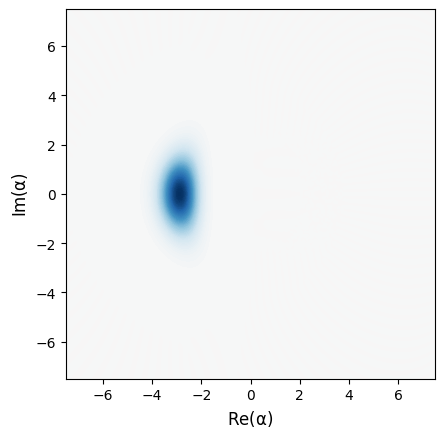

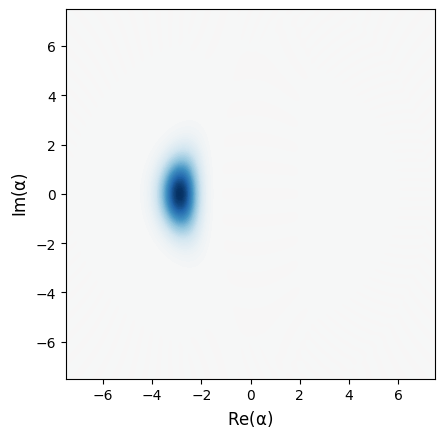

In [134]:
fig, ax = qt.plot_wigner(log1)
ax.set_aspect('equal')
fig, ax = qt.plot_wigner((cat_p + cat_m).unit())
ax.set_aspect('equal')

In [135]:
from scipy.special import hermite, factorial

def compute_px(psi, xs):
    Ncut = 50
    n = np.arange(Ncut)
    Hn = [hermite(v) for v in n]
    x0 = 1/np.sqrt(2)
    norm_consts = 1.0 / np.sqrt(x0 * np.sqrt(np.pi) * (2**n * factorial(n)))
    Hn_x = np.array([Hn_i(xs/x0) for Hn_i in Hn])
    phi_n_x = norm_consts[:, np.newaxis] * np.exp(-xs**2 / (2 * x0**2)) * Hn_x
    coefficients = psi.full()[:Ncut].flatten()
    psi_x = np.dot(coefficients, phi_n_x)
    prob_x = np.abs(psi_x)**2
    return prob_x

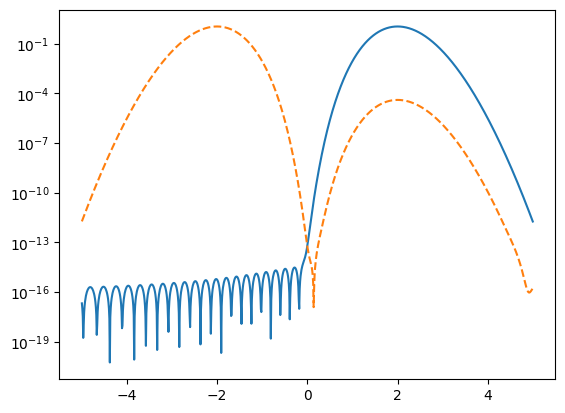

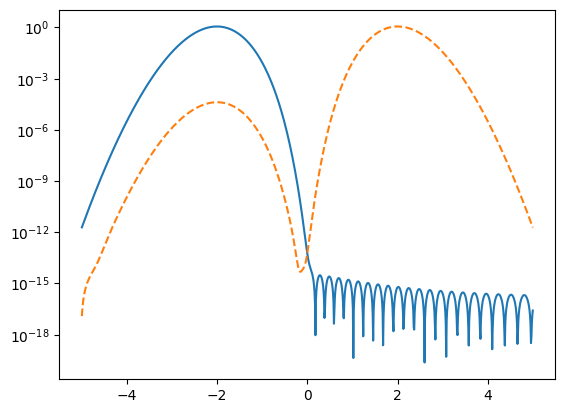

In [136]:
xs = np.linspace(-5, 5, 1001)
plt.plot(xs, compute_px(log0, xs), label='log0')
plt.plot(xs, compute_px((cat_p + cat_m).unit(), xs), '--', label='sum')
plt.yscale('log')
plt.show()

plt.plot(xs, compute_px(log1, xs), label='log0')
plt.plot(xs, compute_px((cat_p - cat_m).unit(), xs), '--', label='sum')
plt.yscale('log')
plt.show()